# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Bahar
- **Email:** 20sa1071@mhs.amikompurwokerto.ac.id
- **ID Dicoding:** ahmadbahar911

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penyewaan sepeda per bulan untuk setiap tahun berdasarkan data agregat?
- Pertanyaan 2 : Berapa jumlah penyewa sepeda berdasarkan rentang waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import kagglehub


## Data Wrangling

### Gathering Data

In [8]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [12]:
df_hour = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
df_day = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:** Berdasarkan output di atas, kita dapat mengidentifikasi beberapa kolom penting dalam dataset, seperti:
- instant: Nomor urut baris data.
- dteday: Tanggal pengambilan data.
- season: Musim yang diwakili oleh angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun, dengan 0 untuk 2011 dan 1 untuk 2012.
- mnth: Bulan, dari 1 hingga 12.
- hr: Jam dalam format 24 jam.
- holiday: Nilai 1 jika hari tersebut merupakan libur, dan 0 jika bukan.
- weekday: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
- workingday: Nilai 1 jika hari tersebut adalah hari kerja (bukan libur), dan 0 jika tidak.
- weathersit: Kondisi cuaca dalam bentuk kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu yang dirasakan atau "feels like".
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Total jumlah penyewaan sepeda.







### Assessing Data

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset ini terdiri dari 17.379 baris dan 17 kolom. Tidak ada nilai yang hilang (null) dalam dataset ini karena jumlah data non-null di setiap kolom sama dengan total jumlah baris. Dataset ini memiliki berbagai jenis tipe data, antara lain:
  - **Kolom numerik**: Kolom seperti season, yr, mnth, hr, dan lainnya memiliki tipe data integer.
  - **Kolom float**: Kolom seperti temp, atemp, hum, dan windspeed menggunakan tipe data float64.
  - **Kolom objek**: Kolom dteday memiliki tipe data objek (string). Catatan: kolom ini mungkin mengandung nilai yang tidak akurat.

In [15]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset ini terdiri dari 731 baris dan 16 kolom. Tidak ada nilai yang hilang (null) dalam dataset ini karena jumlah data non-null di setiap kolom sama dengan total jumlah baris. Dataset ini memiliki berbagai jenis tipe data, antara lain:
  - **Kolom numerik**: Kolom seperti season, yr, mnth, dan lainnya memiliki tipe data integer.
  - **Kolom float**: Kolom seperti temp, atemp, hum, dan windspeed menggunakan tipe data float64.
  - **Kolom objek**: Kolom dteday memiliki tipe data objek (string). Catatan: kolom ini mungkin mengandung nilai yang tidak akurat.

In [16]:
# Mengecek apakah ada duplikasi di dataset
df_hour.duplicated().sum()

0

In [17]:
# Mengecek apakah ada duplikasi di dataset
df_day.duplicated().sum()

0

**Insight:**

- tidak ada duplikasi pada dataset


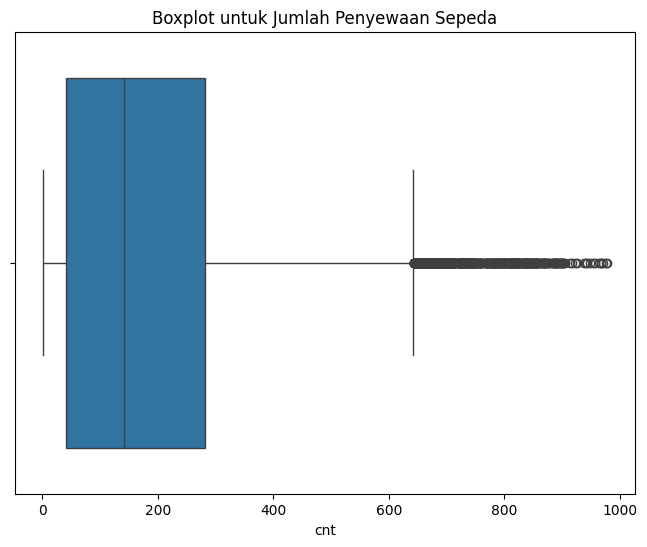

In [18]:
# Membuat boxplot untuk kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_hour['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

In [20]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores = np.abs(stats.zscore(df_hour['cnt']))

# Menentukan threshold (contoh: Z-Score > 3 dianggap outlier)
threshold = 3
outliers = np.where(z_scores > threshold)

# Menampilkan baris yang merupakan outlier
df_hour.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743


**Insight:**

*   Ada 244 baris data yang terdeteksi sebagai outlier dengan nilai z-score lebih dari 3.




### Cleaning Data

In [22]:
# Mendapatkan index baris yang bukan outlier
non_outliers = np.where(z_scores <= threshold)


# Membuat DataFrame baru tanpa outlier
df_cleaned = df_hour.iloc[non_outliers]
df_cleaned.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
# Mengubah kolom 'dteday' dari string ke datetime
df_cleaned.loc[:, 'dteday'] = pd.to_datetime(df_cleaned['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
df_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17135.00000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,8616.41033,2.494718,0.495477,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,34.818267,145.672250,180.490516
std,5011.06776,1.109381,0.499994,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,48.728987,135.894681,166.101082
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4284.50000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,39.000000
50%,8568.00000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,113.000000,139.000000
75%,12916.50000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,47.000000,214.000000,273.000000
max,17379.00000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,712.000000,733.000000


**Insight:**

- Kolom dteday telah berhasil diubah menjadi tipe data datetime, dan data tersebar antara 1 Januari 2011 hingga 31 Desember 2012.
- Rata-rata jumlah sepeda yang disewa (cnt) adalah sekitar 180 sepeda per jam, dengan nilai minimum 1 dan maksimum 733 sepeda.
- Kolom temp (temperatur berskala 0 hingga 1) memiliki nilai rata-rata 0.49, sedangkan kolom hum (kelembaban) memiliki rata-rata 0.63.
- Jumlah pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna tidak terdaftar (casual), dengan rata-rata 145 pengguna terdaftar dan 34 pengguna tidak terdaftar per jam.
- Distribusi data untuk variabel lain:
    - Season: Nilai rata-rata 2.49, menunjukkan bahwa sebagian besar data berasal dari musim kedua hingga ketiga (Spring hingga Summer).
    - Weathersit: Nilai rata-rata 1.42, yang berarti cuaca umumnya adalah kondisi baik atau cukup baik.
    - Windspeed: Rata-rata nilai kecepatan angin adalah 0.19, dengan nilai tertinggi 0.85.
- Dataset ini mencakup semua informasi cuaca, waktu, dan kondisi operasional yang relevan dengan analisis jumlah penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

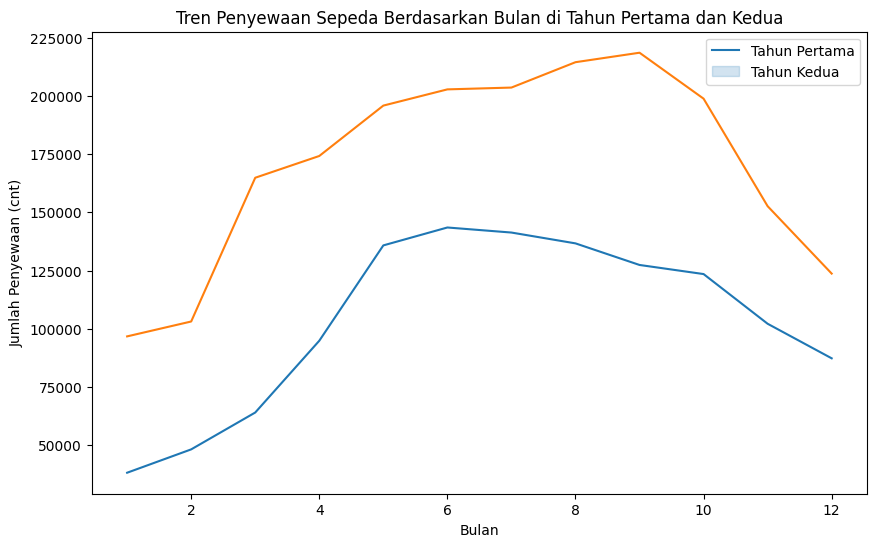

In [39]:
# Membuat data agregat untuk tren penyewaan per bulan di setiap tahun
monthly_trend = df_hour.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Visualisasi dengan line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr')
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.legend(['Tahun Pertama', 'Tahun Kedua'])
plt.show()

**Insight:**
- Jumlah penyewaan sepeda di tahun kedua selalu lebih tinggi dibandingkan dengan tahun pertama.  Pada periode awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus), terdapat peningkatan yang signifikan.  Namun, di akhir tahun, jumlah penyewaan terus menunjukkan penurunan yang konsisten.

### Pertanyaan 2:

In [25]:
# Membuat kolom baru 'rentang_waktu' berdasarkan jam
def assign_time_of_day(hr):
    if 6 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 16:
        return 'Siang'
    elif 16 <= hr < 20:
        return 'Sore'
    else:
        return 'Malam'




In [26]:
# Asign jam ke kategori rentang waktu
df_hour['rentang_waktu'] = df_hour['hr'].apply(assign_time_of_day)

In [37]:
# Hitung jumlah penyewaan berdasarkan rentang waktu
grouped = df_hour.groupby('rentang_waktu')['cnt'].sum().reset_index()


<ipython-input-38-2546e05840fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rentang_waktu', y='cnt', data=grouped, palette='viridis')  # Menggunakan palet warna 'viridis'


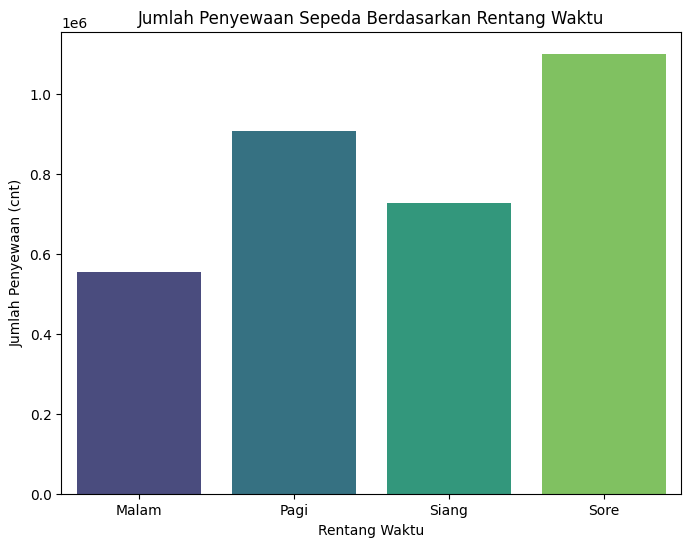

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='rentang_waktu', y='cnt', data=grouped, palette='viridis')  # Menggunakan palet warna 'viridis'
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Rentang Waktu')
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()


 **Insight:**
*   Malam hari mencatat jumlah penyewaan paling sedikit, sekitar 600 ribu.
*   Pagi hari menempati posisi kedua dengan total sekitar 900 ribu penyewaan.  
*   Siang hari memiliki jumlah penyewaan yang lebih rendah dibandingkan pagi dan sore, yaitu sekitar 700 ribu.  
*   Sore hari mencatat jumlah penyewaan tertinggi, melebihi 1 juta penyewaan.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclution pertanyaan 1:** Berdasarkan data yang dianalisis, dapat disimpulkan bahwa jumlah penyewaan sepeda pada tahun kedua secara konsisten lebih tinggi dibandingkan tahun pertama. Peningkatan signifikan terlihat pada awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus). Namun, di akhir tahun, jumlah penyewaan mengalami penurunan yang konsisten. Tren ini menunjukkan adanya faktor musiman dan perubahan perilaku penyewa sepanjang tahun yang perlu diperhatikan dalam perencanaan dan pengelolaan penyewaan sepeda.
- **Conclution pertanyaan 2:** Berdasarkan data yang dianalisis, jumlah penyewaan sepeda menunjukkan variasi sepanjang hari. Sore hari mencatatkan jumlah penyewaan tertinggi, melebihi 1 juta penyewaan. Pagi hari menempati posisi kedua dengan sekitar 900 ribu penyewaan, sementara siang hari tercatat lebih rendah, sekitar 700 ribu penyewaan. Malam hari memiliki jumlah penyewaan paling sedikit, yaitu sekitar 600 ribu. Hal ini menunjukkan bahwa waktu sore memiliki permintaan tertinggi, sementara malam hari cenderung menjadi periode dengan aktivitas penyewaan yang paling rendah.